#### Dataset

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

Dataset link:- https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

```
Product Purchased:	KP281, KP481, or KP781
Age:	In years
Gender:	Male/Female
Education:	In years
MaritalStatus:	Single or partnered
Usage:	The average number of times the customer plans to use the treadmill each week.
Income:	Annual income (in $)
Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
Miles:	The average number of miles the customer expects to walk/run each week
```

### price of products- Portfolio
```
Product Portfolio:

1. The KP281 is an entry-level treadmill that sells for $1,500.
2. The KP481 is for mid-level runners that sell for $1,750.
3. The KP781 treadmill is having advanced features that sell for $2,500.
``

In [4]:
%load_ext autoreload
%autoreload 2

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm, binom, poisson, expon

In [2]:
aerofit_weblink = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749'

In [7]:
df = pd.read_csv(aerofit_weblink)
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [8]:
df.shape

(180, 9)

In [38]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [40]:
(df.dtypes.index, df.dtypes.values)

(Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
        'Fitness', 'Income', 'Miles'],
       dtype='object'),
 array([dtype('O'), dtype('int64'), dtype('O'), dtype('int64'), dtype('O'),
        dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64')],
       dtype=object))

#### just segregating numerical and categorical variables

In [53]:
categorical_variable = list()
numerical_variable = list()
for i in range(len(df.dtypes.index)):
    if df.dtypes.values[i] == df.dtypes.values[0]:
        categorical_variable.append(df.dtypes.index[i])
    else:
        numerical_variable.append(df.dtypes.index[i])

In [54]:
(categorical_variable, numerical_variable)

(['Product', 'Gender', 'MaritalStatus'],
 ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'])

In [66]:
pd.DataFrame({i : [df[i].unique()] for i in categorical_variable})

,Product,Gender,MaritalStatus
0,"[KP281, KP481, KP781]","[Male, Female]","[Single, Partnered]"


In [55]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


## Couple observations - 
#### The range of age is from 18 - 50
#### The median income or the higher # of people have income ~ 58000, which is a little away from mean ~ 53000- therefore, there might be outliers weighing the data to that side
#### the usgae of treadmill is around ~ 4 times


#### Value counts for each categorical variable

In [67]:
categorical_variable

['Product', 'Gender', 'MaritalStatus']

In [79]:
for i in categorical_variable:
    print(df[i].value_counts().reset_index(), "\n")

   index  Product
0  KP281       80
1  KP481       60
2  KP781       40 

    index  Gender
0    Male     104
1  Female      76 

       index  MaritalStatus
0  Partnered            107
1     Single             73 



## observations
```
1. product "KP281" is the most used product
2. There are more male members than female
3. more couples than singles
```

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


## Let's do some outlier detection

In [81]:
numerical_variable

['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

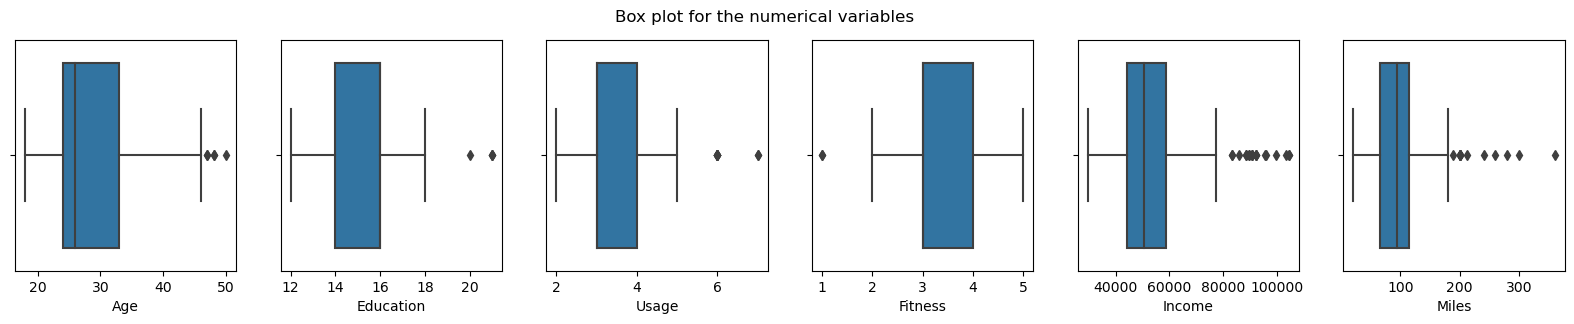

In [94]:
fig, axes = plt.subplots(1, len(numerical_variable), figsize = (20, 3))
plt.suptitle('Box plot for the numerical variables')


i = 0
for col in numerical_variable:
    sns.boxplot(data = df, x = col, ax = axes[i])
    i = i + 1

In [113]:
## function to calculate the ouliers

def calculate_outlier(data):    
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    iqr = q3 - q1
    
    lower_bound  = q1 - 1.5* iqr
    upper_bound = q3 + 1.5 * iqr
    
    outlier = [value for value in data if value < lower_bound or value > upper_bound]
    
    return outlier
    

In [114]:
outlier_dic  = {col : [calculate_outlier(df[col])] for col in numerical_variable}   
    
outlier_df = pd.DataFrame(outlier_dic)

In [115]:
outlier_df

,Age,Education,Usage,Fitness,Income,Miles
0,"[47, 50, 48, 47, 48]","[20, 21, 21, 21]","[6, 6, 6, 7, 6, 7, 6, 6, 6]","[1, 1]","[83416, 88396, 90886, 92131, 88396, 85906, 908...","[188, 212, 200, 200, 200, 240, 300, 280, 260, ..."


In [116]:
numerical_variable

['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

In [117]:
outlier_dic = dict()
for col in numerical_variable:
    outlier_dic.update({col : [len(calculate_outlier(df[col]))]})

    
pd.DataFrame(outlier_dic)

,Age,Education,Usage,Fitness,Income,Miles
0,5,4,9,2,19,13


#### the above data frame shows the number of outliers in each numerical variable
```
1. For all attributes, there are no missing values 
2. For Age,Education, Usage there are very less outliers,
   For Income, Miles there are more outliers
   
3. the fitness seems to be a categrorical variable with more than 2 categories
```

## Visual Analysis

#### Univariate

<Axes: xlabel='Product', ylabel='count'>

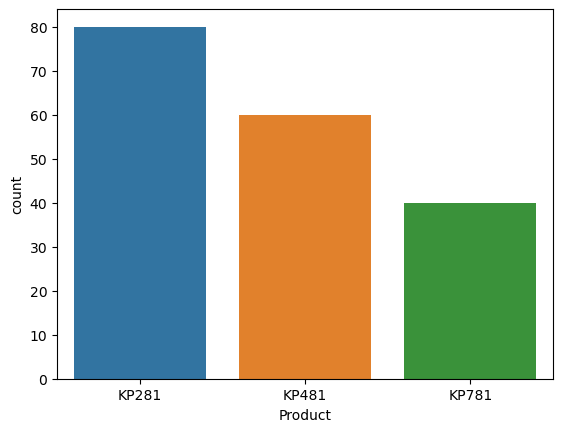

In [118]:
sns.countplot(data = df, x = 'Product')

In [148]:
df_product_count = df.groupby(['Product'])[['Product']].count()
df_product_count.rename({'Product': 'count'}, axis = 1, inplace = True)
df_product_count['price'] = pd.Series([1500, 1750, 2500]).values
df_product_count['% of units sold'] = (df_product_count['count'] / df_product_count['count'].sum())* 100
df_product_count['Sales in $'] = df_product_count['count'] * df_product_count ['price']  
df_product_count

,count,price,% of units sold,Sales in $
Product,,,,
KP281,80,1500,44.444444,120000
KP481,60,1750,33.333333,105000
KP781,40,2500,22.222222,100000


## Insight

```
even though the count for KP281 is higher, the sale is more or less similar for all the products
```

In [149]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


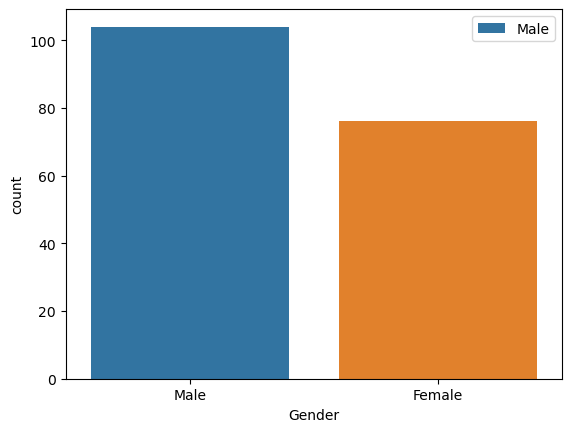

In [152]:
sns.countplot(data = df, x = 'Gender')

In [155]:
gender_df = df.groupby(['Gender'])[['Gender']].count()
gender_df.index.name = "gender"
gender_df.rename({"Gender": "Count"}, axis = 1, inplace = True)
gender_df['% of total'] = (gender_df['Count'] / gender_df['Count'].sum()) * 100
gender_df

,Count,% of total
gender,,
Female,76,42.222222
Male,104,57.777778


#### the male participation (57%) is more than female 

<Axes: xlabel='MaritalStatus', ylabel='count'>

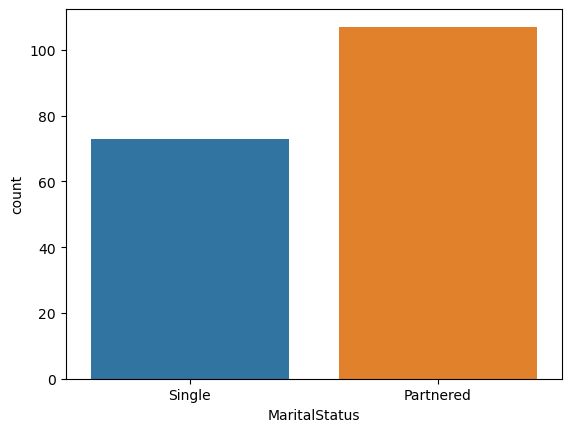

In [156]:
sns.countplot(data = df, x = 'MaritalStatus')

#### there are more partnered people than singles

In [161]:
fit_df = df.groupby(['Fitness'])[['Fitness']].count()
fit_df.index.name = "fitness"
fit_df.rename({"Fitness": "count"}, axis = 1 , inplace = True)

fit_df['% of total'] = (fit_df['count'] / fit_df['count'].sum()) * 100
fit_df

,count,% of total
fitness,,
1,2,1.111111
2,26,14.444444
3,97,53.888889
4,24,13.333333
5,31,17.222222


### around 53 % people, majority, treat them in 3 level fitness 

#### Lets look at the education of people now - might need binning here

In [175]:
df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

<Axes: xlabel='Education', ylabel='count'>

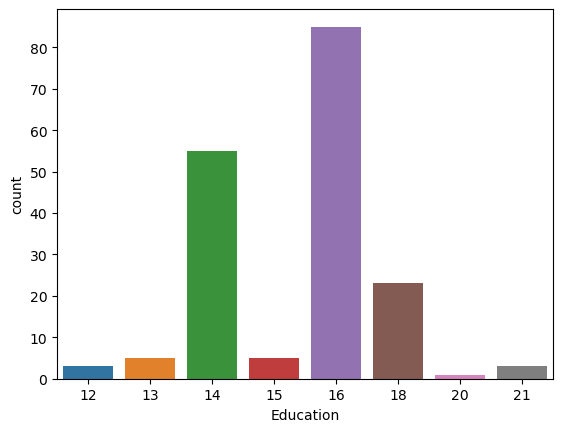

In [176]:
sns.countplot(data = df, x = 'Education')

In [194]:
count_series = pd.cut(df['Education'], [10, 13, 16, 21]).astype('str')
count_series

0      (13, 16]
1      (13, 16]
2      (13, 16]
3      (10, 13]
4      (10, 13]
         ...   
175    (16, 21]
176    (16, 21]
177    (13, 16]
178    (16, 21]
179    (16, 21]
Name: Education, Length: 180, dtype: object

<Axes: ylabel='count'>

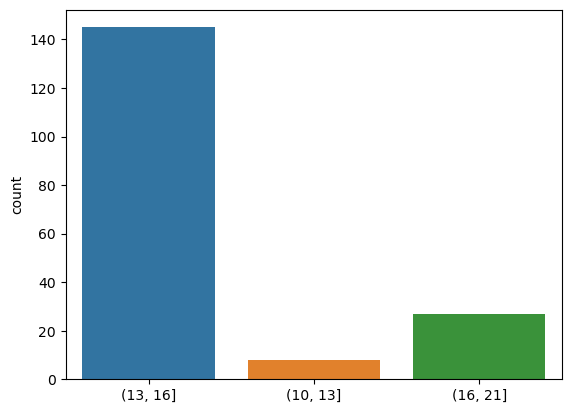

In [196]:
sns.countplot(data = count_series, x = count_serr.values)

In [204]:
df['Education']

0      14
1      15
2      14
3      12
4      13
       ..
175    21
176    18
177    16
178    18
179    18
Name: Education, Length: 180, dtype: int64

In [222]:
col = 'Education'
bin_series = pd.cut(df[col], [10,13,16,19,21]).astype('str')
print(bin_series, "\n")
df_temp = pd.DataFrame({ col : bin_series})
print(df_temp, "\n")
df_temp = df_temp.groupby([col])[[col]].count()
df_temp.rename({col : "count"}, axis = 1, inplace = True)
print(df_temp, "\n")

0      (13, 16]
1      (13, 16]
2      (13, 16]
3      (10, 13]
4      (10, 13]
         ...   
175    (19, 21]
176    (16, 19]
177    (13, 16]
178    (16, 19]
179    (16, 19]
Name: Education, Length: 180, dtype: object 

    Education
0    (13, 16]
1    (13, 16]
2    (13, 16]
3    (10, 13]
4    (10, 13]
..        ...
175  (19, 21]
176  (16, 19]
177  (13, 16]
178  (16, 19]
179  (16, 19]

[180 rows x 1 columns] 

           count
Education       
(10, 13]       8
(13, 16]     145
(16, 19]      23
(19, 21]       4 



## creating a method to bin any numerical variable and find out the leading range

In [225]:
def bin_col(df : pd.DataFrame, col: str, lims: list)-> pd.DataFrame:
    bin_series = pd.cut(df[col], lims).astype('str')
    df_temp = pd.DataFrame({col : bin_series, "count": df[col]})
    df_temp = df_temp.groupby([col])[[col]].count()
    df_temp.rename({col : "count"}, axis = 1, inplace = True)
    df_temp['% total'] = (df_temp["count"] / df_temp["count"].sum()) * 100 
    
    return df_temp

In [226]:
bin_col(df, 'Education', [10, 13, 16, 19, 21])

,count,% total
Education,,
"(10, 13]",8,4.444444
"(13, 16]",145,80.555556
"(16, 19]",23,12.777778
"(19, 21]",4,2.222222


#### most of the customer have 14-16 years(both included) of education 

#### now, lets look at histogram/distribution and box plot together to find out skewness in the data and the outliers

In [239]:
def distnbox(df: pd.DataFrame, col: 'str'):
    fig, axes = plt.subplots(1, 2, figsize = (16, 4))
    sns.histplot(data = df, x = col, ax = axes[0], kde = True)
    sns.boxplot(data = df, x = col, ax = axes[1])

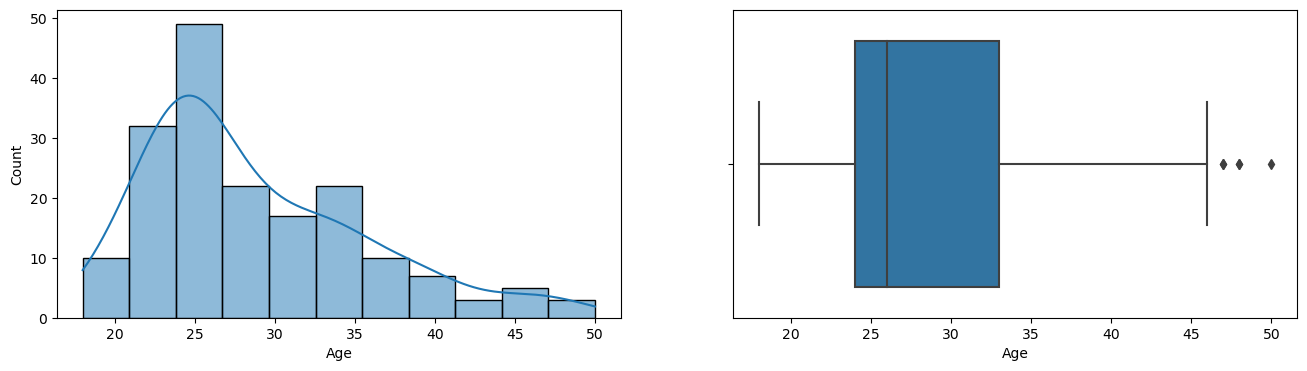

In [240]:
distnbox(df, 'Age')

In [241]:
bin_col(df, "Age", [10,  15, 25, 30, 35, 40, 45, 50])

,count,% total
Age,,
"(15, 25]",79,43.888889
"(25, 30]",41,22.777778
"(30, 35]",32,17.777778
"(35, 40]",16,8.888889
"(40, 45]",6,3.333333
"(45, 50]",6,3.333333


#### 43% of people are located in the range of 16-25 yesrs old

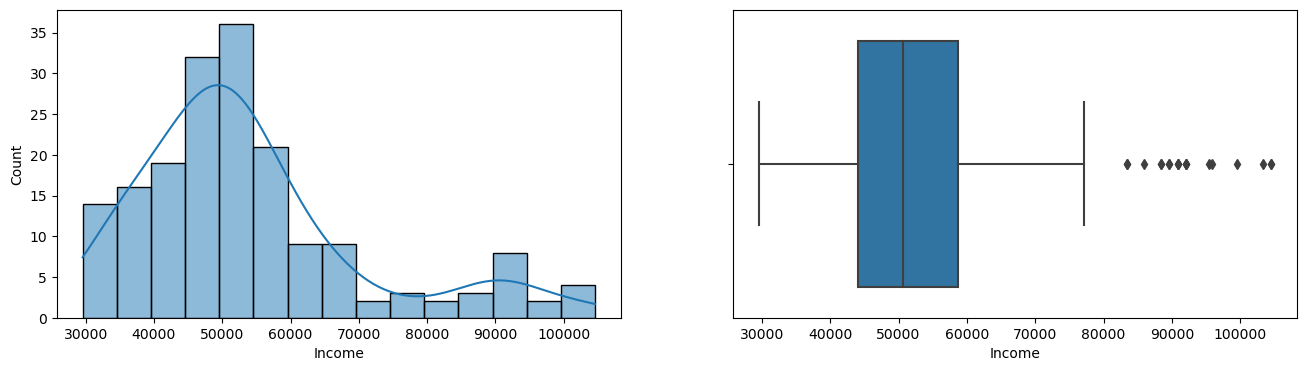

In [242]:
distnbox(df, 'Income')

In [244]:
bin_col(df, "Income", [df['Income'].min(), 40000 , 60000, df['Income'].max() ])

,count,% total
Income,,
"(29562, 40000]",31,17.222222
"(40000, 60000]",106,58.888889
"(60000, 104581]",42,23.333333
nan,1,0.555556


### Comments:
1. 58% of of customers have income around $40000 to $60000
2. Only 17% are below this range and 23% are above $60000 

#### lets do some correlation plots

In [245]:
numerical_variable

['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

In [252]:
df[numerical_variable]

,Age,Education,Usage,Fitness,Income,Miles
0,18,14,3,4,29562,112
1,19,15,2,3,31836,75
2,19,14,4,3,30699,66
3,19,12,3,3,32973,85
4,20,13,4,2,35247,47
...,...,...,...,...,...,...
175,40,21,6,5,83416,200
176,42,18,5,4,89641,200
177,45,16,5,5,90886,160
178,47,18,4,5,104581,120


In [253]:
df[numerical_variable].corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<Axes: >

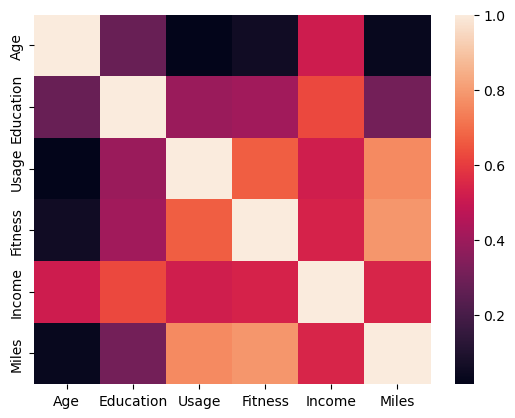

In [254]:
sns.heatmap(data = df[numerical_variable].corr())

#### Usage, miles planned to cover, and fitness are highly dependent on the age

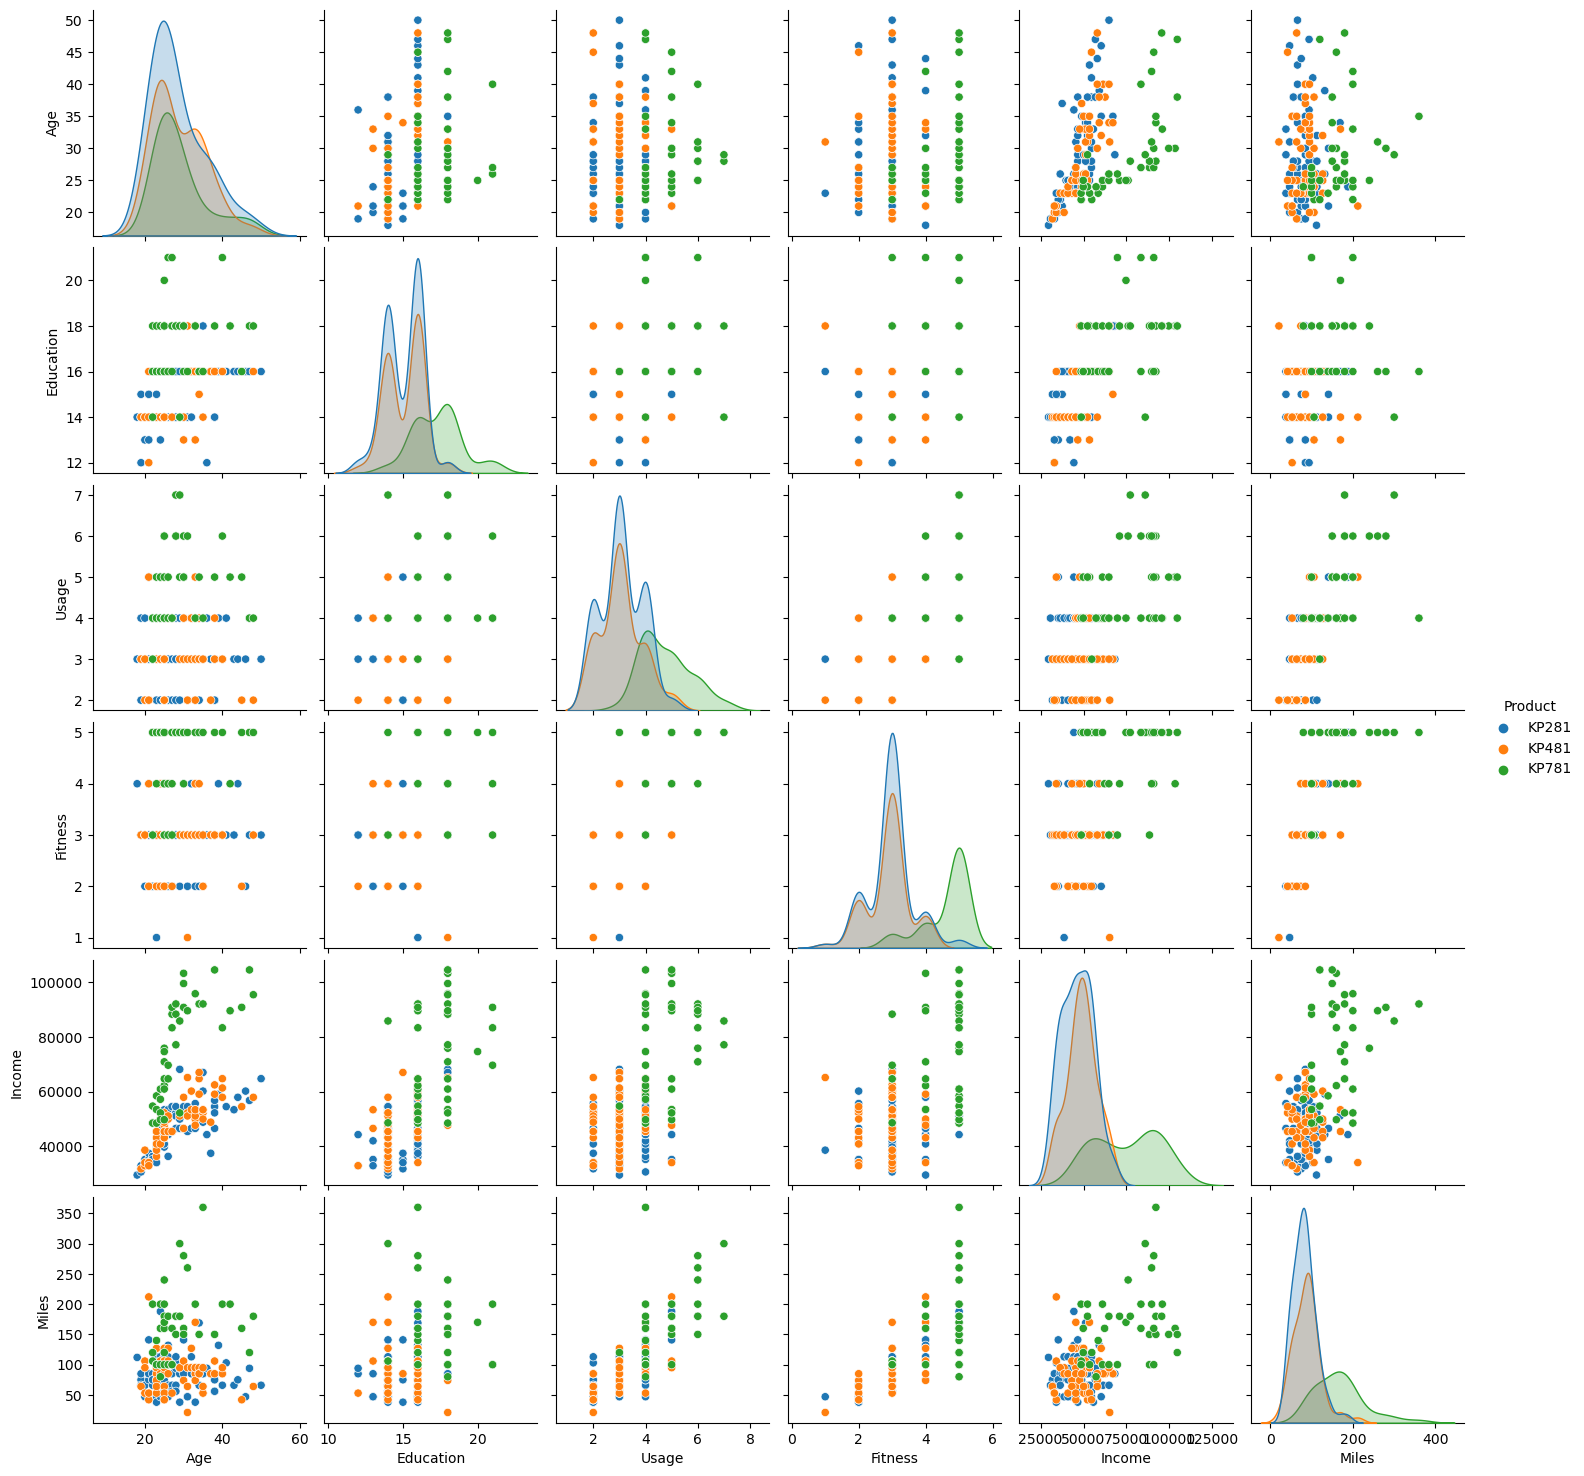

In [255]:
sns.pairplot(data = df, hue = 'Product')

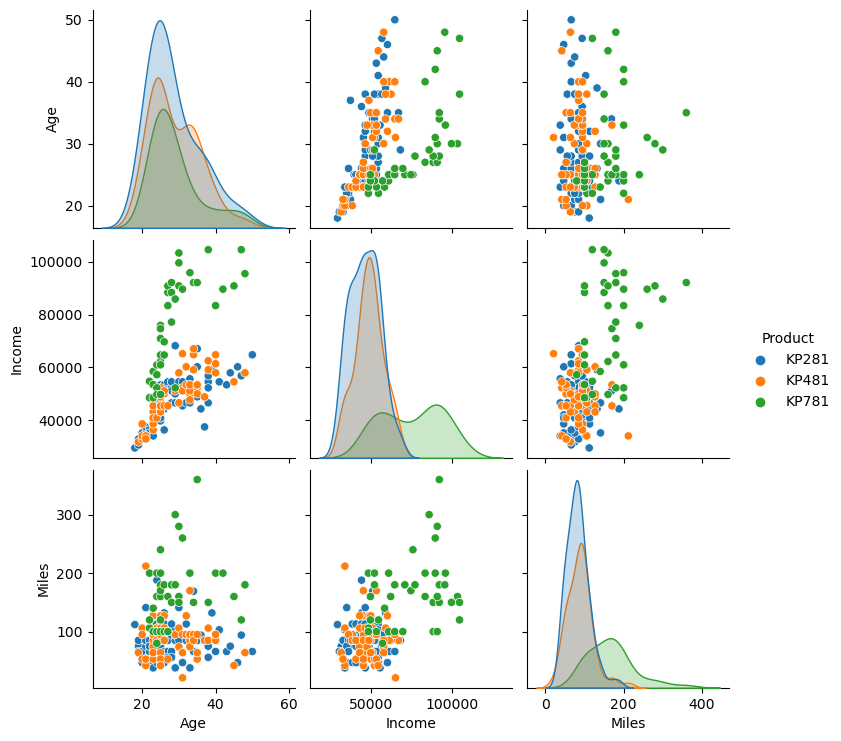

In [257]:
sns.pairplot(data = df[['Age', 'Income', 'Miles', 'Product']], hue = 'Product')

#### income has correlation with miles and age

## Bivariate analysis

### Product vs Gender

<Axes: xlabel='Product', ylabel='count'>

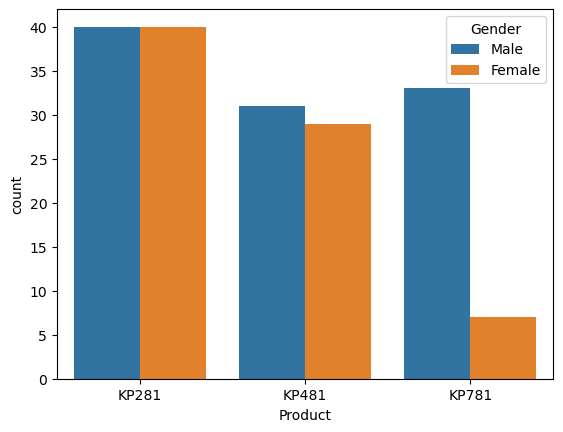

In [258]:
sns.countplot(df, hue = 'Gender', x = 'Product')

Product "KP781" is bought by Male customers more than Female customers
Product "KP481" and "KP281" is bought by both Male and Female customers

<Axes: xlabel='Product', ylabel='count'>

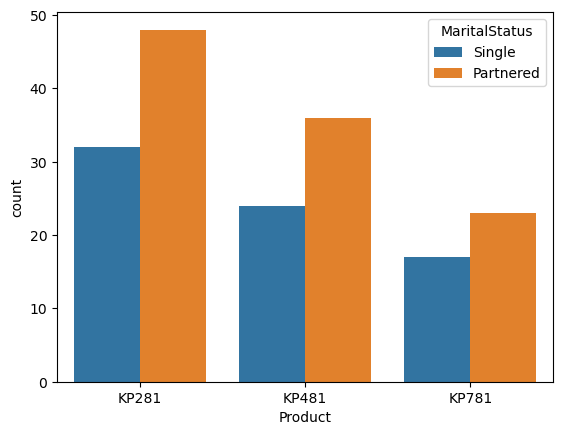

In [259]:
sns.countplot(df, x = 'Product', hue = 'MaritalStatus')

more of the partnered guys than singles for all the products


### product vs fitness

<Axes: xlabel='Product', ylabel='count'>

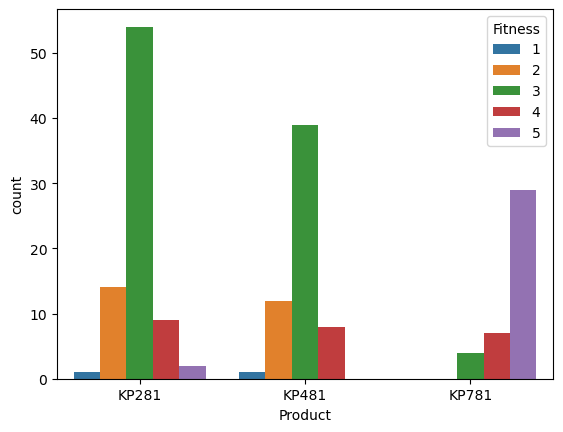

In [260]:
sns.countplot(df, x = 'Product', hue = 'Fitness')

highly fit people use KP781

#### product vs age

<Axes: xlabel='Product', ylabel='Age'>

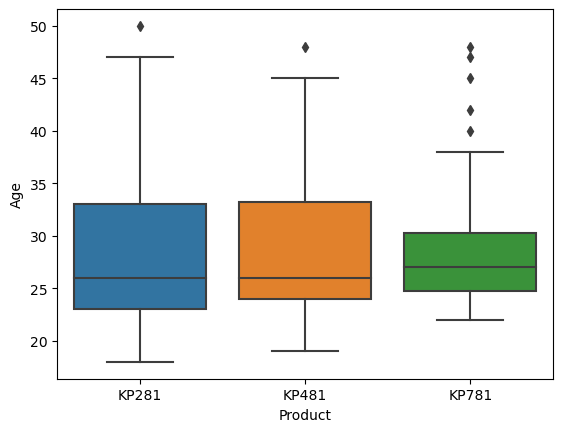

In [261]:
sns.boxplot(data = df, y = 'Age' , x = 'Product')

<Axes: xlabel='Age', ylabel='count'>

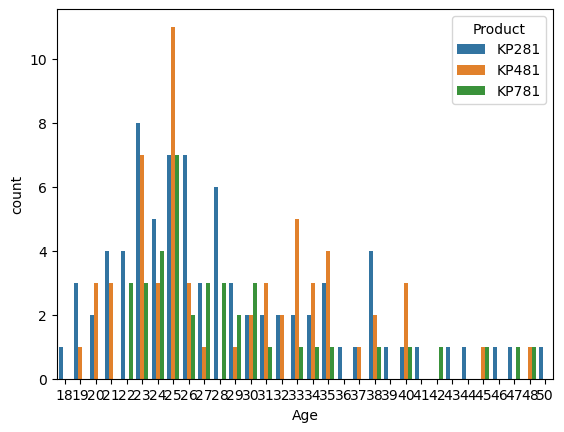

In [262]:
sns.countplot(data = df, x = "Age", hue = "Product")

#### Doesn't make senes, therefore, lets bin Age

<Axes: xlabel='Age', ylabel='count'>

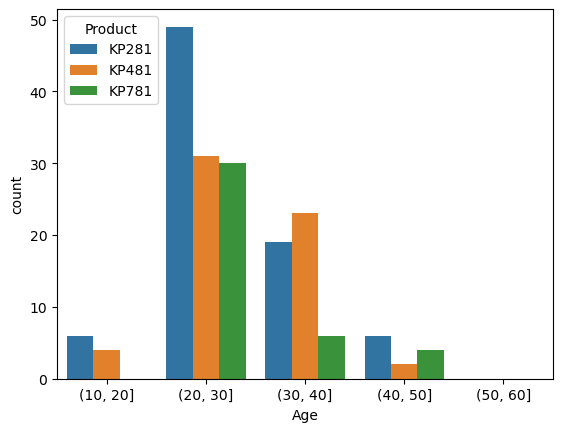

In [263]:
sns.countplot(data = df, x = pd.cut(df['Age'], [10,20,30,40,50,60]), hue = 'Product')

```
1. Almost all products attract age groups 25-30 
2. 25-30 customers has bought KP281 more than others 
```

<Axes: xlabel='Education', ylabel='count'>

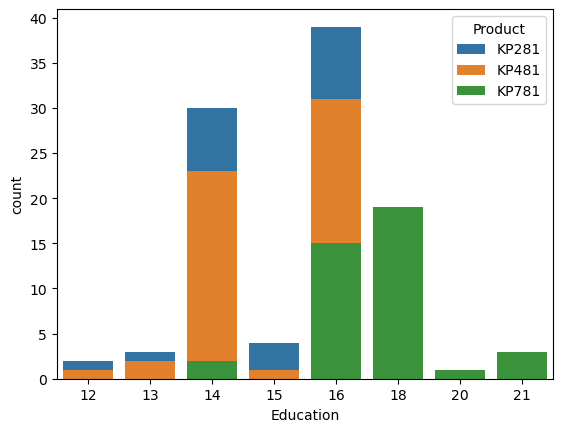

In [265]:
sns.countplot(data = df, x = 'Education', dodge = False, hue = 'Product')

#### 
```
KP481, KP281 is bought by customers with 14-16 yrs of Education
KP781 is mostly bought by customers with 16-21 yrs

```

<Axes: xlabel='Miles', ylabel='count'>

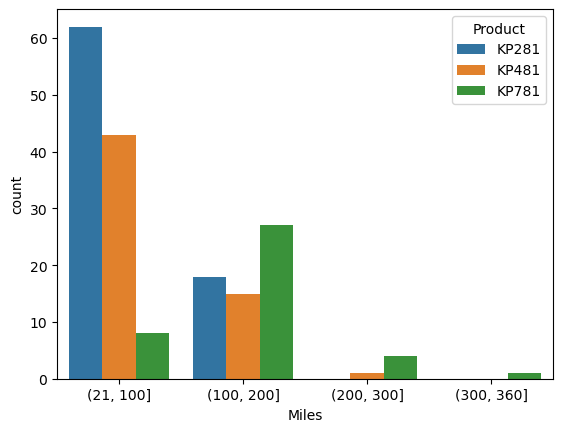

In [267]:
sns.countplot(data = df, x = pd.cut(df['Miles'], [df['Miles'].min(),100, 200, 300 ,df['Miles'].max()]), hue = 'Product')

```
KP781 is bought mostly by customers with high "Miles" (Expected Walking distance) 
KP 481, KP 281 are bought mostly by customers with Moderate/Low "Miles" value
```

#### summary

1. On the overall, Partnered customers buy more products. 

2. Product "KP781" is bought by Male customers more than Female customers
Otherwise There is not much correlation between Product Type and Gender

3. KP281, KP481 are bought by customer who are moderately fit or less fit.
Where as KP781 is bought by customer who are very fit.

4. High usage: KP781
Moderate usage: KP481, KP281

5. Almost all products attract age groups 25-30 

6. KP781 is bought mostly by customers with high income 
KP481, KP281 are bought mostly by customers with Moderate/Low income

7. KP781 is bought mostly by customers with high "Miles" (Expected Walking distance) 
KP 481, KP 281 are bought mostly by customers with Moderate/Low "Miles" value

<Axes: xlabel='Usage', ylabel='Income'>

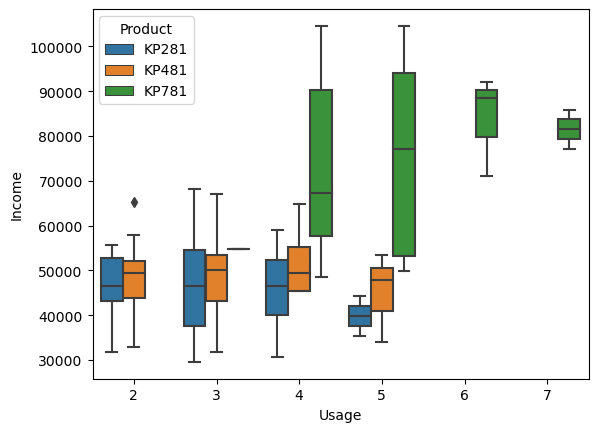

In [268]:
sns.boxplot(x = df['Usage'], y = df['Income'], hue = df['Product'])

Example Customer Profile for "KP481":

Fitness         : 2-4 on scale of 5
Usage           : 2-4 times a week
Age             : 20-40
Education       : 14-16
Income          : Moderate, Range: [40000 to 60000]
Miles           : 50-100

(Although Product "KP481" is bought by both Male and Female customers, Gender: Male is taken as example)
(Although Product "KP481" is bought by both Partnered and Single customers, MaritalStatus: Partnered is taken as example)

Example Customer Profile for "KP781":

Gender          : Male
Fitness         : 4-5 on scale of 5 (Very fit)
Usage           : 4-6 (High Usage) 
Age             : 20-30
Education       : 16-21 (High) 
Income          : High, Range: [60000 to 90000]
Miles           : 100-200 (High)

## Probabilty

### Marginal Probabilites

In [284]:
df_MP = df.groupby(['Product'])[['Product']].count()
df_MP

,Product
Product,
KP281,80
KP481,60
KP781,40


In [285]:
df_MP = df_MP / 180 
df_MP

,Product
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


In [286]:
df_MP[' '] = 'Probability that the customer buys ' + df_MP.index + ' ='
df_MP[[" ", "Product"]].reset_index(drop = True, inplace = True)

In [287]:
df_MP

,Product,
Product,,
KP281,0.444444,Probability that the customer buys KP281 =
KP481,0.333333,Probability that the customer buys KP481 =
KP781,0.222222,Probability that the customer buys KP781 =


#### the probbaility of buying lower end model KP281 is higher than other products

### Conditional Probabilities

In [288]:
df_cross_PG = pd.crosstab(df['Product'], df['Gender'], margins = True)
df_cross_PG

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [290]:
pd.crosstab(df['Product'], df['Gender'], margins = True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [291]:
pd.crosstab(df['Product'], df['MaritalStatus'], margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [292]:

pd.crosstab(df['Product'], df['Fitness'], margins=True)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


Given that 72% of customers with low income buy KP281, 
    And it has high sales in the 20-30 yrs Age groups. 
This product targets the lower income groups. To help target this segment better, 
we can implement flexible payment plans so that customers can pay in installments.

1. Sales for all 3 products is less in the higher age bracket [40+] compared to the lower age brackets [20-30]
KP481, being a mid-level-runner models can be improved by adding features like heart-rate monitors, 
personalised workout modes etc. to attract such age groups and position this product better.

2. Adding such differerentiators is important also because the customer demographics of KP281 and KP481 overlapp 
to a significant extent. 

1. Only 17% of customers who buy KP781 are female, we can improve this metric 
by encourage female customers to buy this product, via special promotions/discounts 
targeting corresponding segment.

2. KP781 is not bought by customers with self-rated-fitness rating 1-3  
it is recommended to emphasize the benifits and features of KP781 on how it can help 
the segment of customers who are not in excellent shape in it's advertising campaigns. 